<a href="https://colab.research.google.com/drive/1Q1_7MxzTXFi3uNsgazZ0XJnkHOmL8Jea?usp=sharing"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>


## Universidad Nacional de Colombia - Sede Manizales
### Confiabilidad de sistemas eléctricos
### **Profesor: Juan David Marín Jiménez** 



---



# Objetivos de este Notebook

* Explicar conceptos básicos de probabilidad y estadística aplicada a la Ingeniería Eléctrica
* Aplicar ejercicios básicos de probabilidad y estadística


# Tabla de Contenido

1. [Introducción](#section1)

2. [Definiciones básicas](#section2)

3. [Probabilidad condicional](#section3)

4. [El caso continuo y la distribución normal](#section4)

5. [Medidas de tendencia central y de variabilidad](#section5)

6. [Dos grandes Teoremas](#section6)

7. [Material adicional](#section7)


<a id='section1'></a>
# 1. Introducción

## Definición de probabilidad

La probabilidad es un concepto matemático **muy útil para modelar el mundo**, ya que nos permite cuantificar y formalizar nuestro conocimiento sobre **eventos futuros cuyo resultado es incierto**. Incluso en un mundo físico completamente determinístico, la probabilidad sigue siendo fundamental en nuestra descripción del mismo.

Básicamente, la probabilidad se refiere a la **predicción de la ocurrencia o no ocurrencia de un evento futuro**, como por ejemplo si lloverá o no, o cuál será la temperatura en un momento determinado. Nos preguntamos cuál es la probabilidad de que nuestra observación sea "sí se produjo el evento", "no se produjo el evento" o "el valor de la variable T es 25,1°C".

Nuestro objetivo inicial es comprender el significado de estas probabilidades y cómo se aplican a diferentes situaciones en el mundo real.

## La probabilidad y la estadística

La Teoría de Probabilidades y la Estadística **son disciplinas matemáticas diferentes**, y aunque hay investigadores que se dedican exclusivamente a una u otra, ***desde el punto de vista de la ciencia de datos***, ***LA PRINCIPAL*** aplicación de la Teoría de Probabilidades es la Estadística. La Teoría de Probabilidades se enfoca en establecer un **modelo probabilístico del mundo**, mientras que **la Estadística se basa en los datos para reconstruir el mejor modelo probabilístico posible**. 



En resumen, en la Teoría de Probabilidades asumimos un conocimiento previo exacto sobre las probabilidades, mientras que en Estadística nuestro punto de partida son los datos.

## Ejemplo

Existen diversas maneras de comprender cómo la probabilidad cuantifica nuestra incertidumbre. Para evitar abordar de entrada una cuestión filosófica potencialmente complicada, comencemos por algo que tal vez nos resulte más familiar: una función de Python que genere "números aleatorios", como la función randint de la librería numpy.random.

Utilizando esta función, podemos realizar el experimento de lanzar repetidamente un dado de seis caras y registrar los resultados. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import minimize

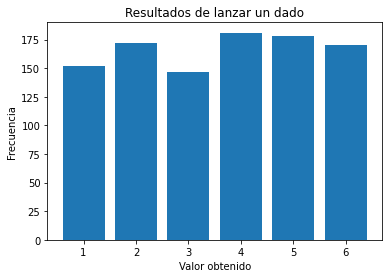

In [ ]:
# Hagamos un experimento! Tiremos un dado 1000 veces.

n_experimentos = 1000
resultados = np.random.randint(1, 7, size=n_experimentos)
valores = np.arange(1, 7)
conteos = np.bincount(resultados)[1:]

plt.bar(valores, conteos)
plt.title("Resultados de lanzar un dado")
plt.xlabel("Valor obtenido")
plt.ylabel("Frecuencia")
plt.show()
# Veamos cuántas veces se obtuvo cada cosa con un histograma

 

Vemos que salen más o menos en iguales proporciones, pero no exactamente.

Observemos algunas cosas:
* Cada vez que repetimos las 1000 tiradas, obtenemos algo ligeramente distinto (¡probarlo!). ¿Quiere eso decir que las probabilidades de sacar un cierto número están fluctuando en el tiempo? ¿O siempre es la misma probabilidad, por más que veamos resultados distintos? 
* Si repetimos con muchas más tiradas, vamos a ver que el resultado se hace mucho más consistente:

Vemos que las fracciones son todas aproximadamente iguales a $0,16$, que es aproximadamente lo mismo que $1/6 = 0,166666...$.

La fracción de ocurrencias está acercándose a un cierto valor que no fluctúa con cada repetición del experimento (o con cada *realización*, que es la palabra que se usa en la jerga probabilística). Vendría bien ponerle nombre a esos números a los que tienden las alturas del histograma normalizado, ¿verdad? Bueno, podemos ponerle... Sí. Probabilidad.

La teoría de probabilidades nos sirve para definir de forma abstracta qué es una probabilidad. Puede que al principio no sea claro que la noción abstracta es la misma que estamos viendo acá, pero quédense tranquilos: la teoría termina demostrando matemáticamente que esta noción de probabilidad como "eso a lo que tiende el histograma" coincide con la definición abstracta. La teoría demuestra, por ejemplo, que a medida que tomo más y más muestras, el histograma normalizado se va pareciendo cada vez más a la distribución de probabilidad de nuestra variable aleatoria. Esto se relaciona con un teorema importante que mencionaremos más adelante: la Ley de los Grandes Números.

Pero me estoy adelantando. Ya usé varias palabras que todavía no vimos: "distribución de probabilidad", "variable aleatoria"... Vayamos a ver bien qué son esas cosas. Pero no dejen los dados muy lejos que ya les vamos a echar mano de nuevo.